In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier


In [2]:
df=pd.read_csv('synthetic_dataset_10000x20.csv')
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


In [3]:
df.shape

(10000, 21)

In [4]:
df.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,0.047000,0.694800,3.011900,0.358156,-0.100387,0.513200
std,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,0.211649,0.460515,2.003986,0.302606,0.667428,0.499851
min,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.004000,-0.999923,0.000000
25%,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,0.000000,0.000000,1.000000,0.132000,-0.756802,0.000000
50%,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,0.000000,1.000000,3.000000,0.275000,-0.157746,1.000000
75%,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,0.000000,1.000000,5.000000,0.508000,0.515501,1.000000
max,74.000000,402769.000000,44644.000000,28664.000000,7.000000,850.000000,441190.000000,72.000000,21.50000,1.000000,1.000000,6.000000,2.031000,0.973848,1.000000


In [5]:
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      10000 non-null  

In [7]:
for col in df.columns:
    print('{}'.format(col),'=',df[col].nunique())

customer_id = 10000
age = 57
income = 9107
savings = 6498
monthly_expenses = 3068
num_dependents = 8
credit_score = 9647
loan_amount = 7999
loan_term_months = 6
employment_years = 182
home_ownership = 4
education = 6
marital_status = 4
region = 4
recent_default = 2
has_credit_card = 2
signup_date = 1982
signup_dayofweek = 7
debt_to_income = 1261
sin_age = 57
target_default_risk = 2


In [8]:
df.drop('customer_id',axis=1,inplace=True)

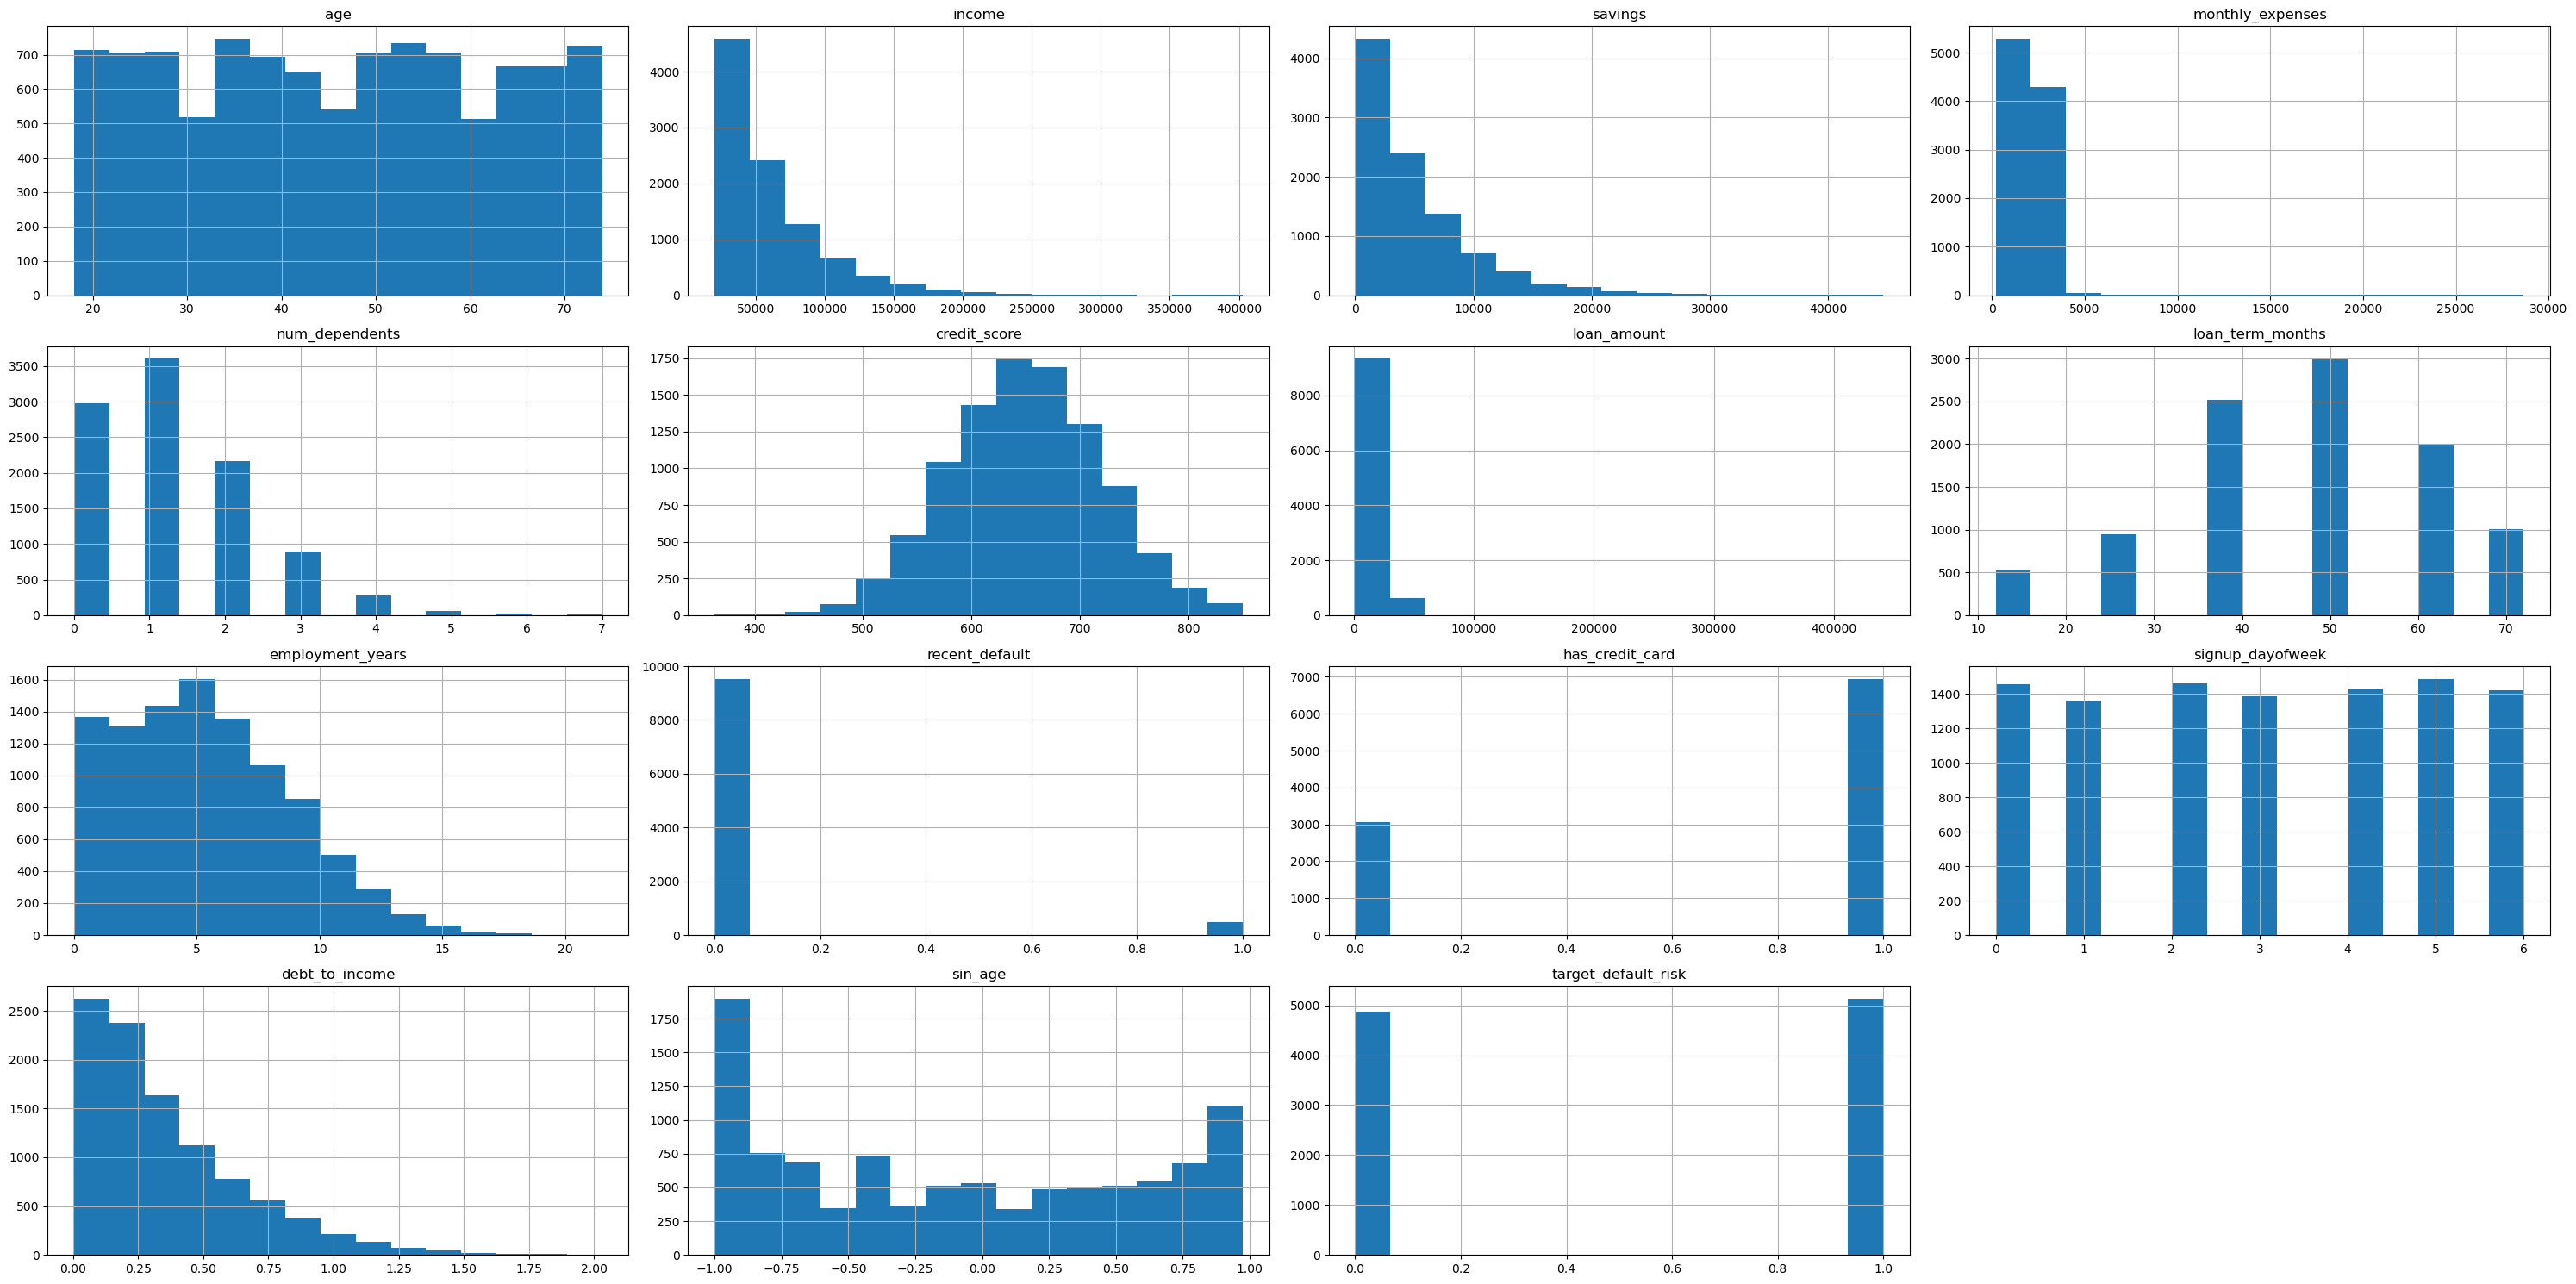

In [9]:
df.hist(bins=15,figsize=(30,15))
plt.tight_layout()

In [10]:
num_cols=df.select_dtypes(include=['int64','int32','float64']).columns.tolist()
cat_cols_1=df.select_dtypes(exclude=['int64','int32','float64']).columns.tolist()

In [11]:
num_cols

['age',
 'income',
 'savings',
 'monthly_expenses',
 'num_dependents',
 'credit_score',
 'loan_amount',
 'loan_term_months',
 'employment_years',
 'recent_default',
 'has_credit_card',
 'signup_dayofweek',
 'debt_to_income',
 'sin_age',
 'target_default_risk']

In [12]:
cat_cols_1

['home_ownership', 'education', 'marital_status', 'region', 'signup_date']

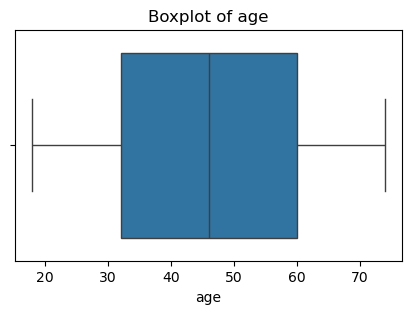

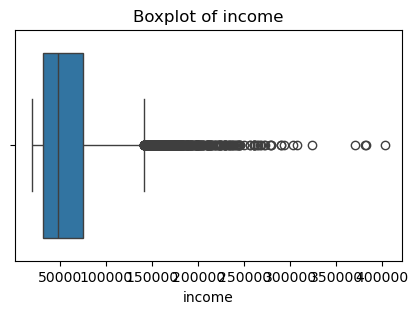

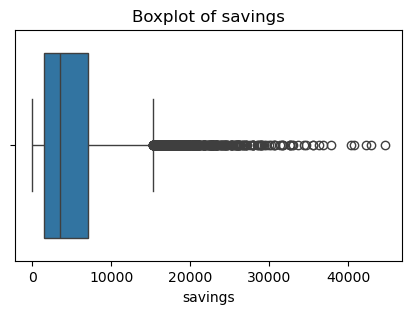

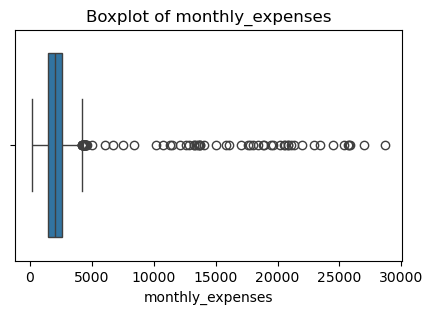

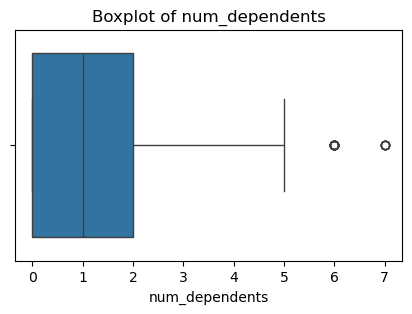

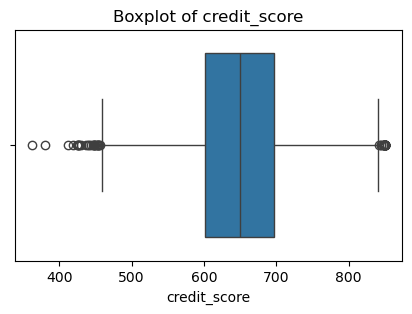

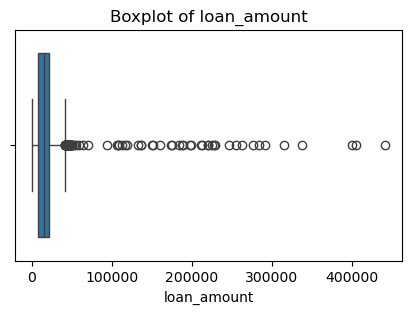

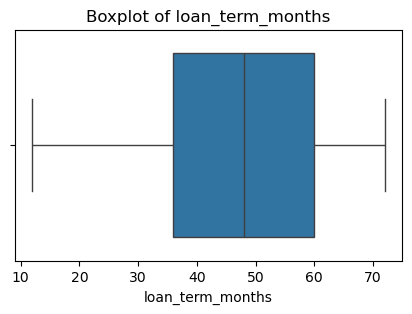

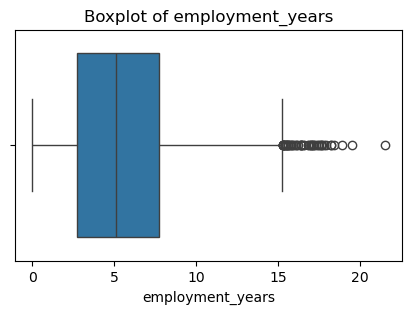

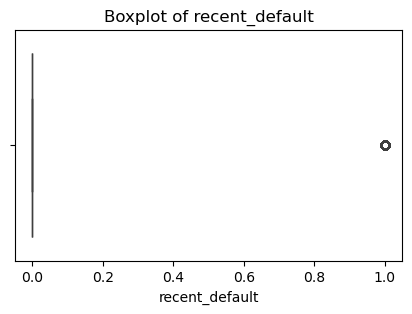

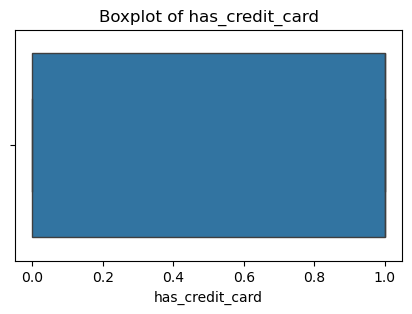

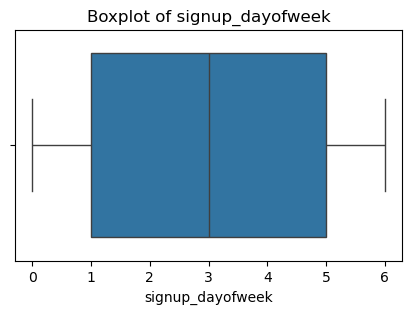

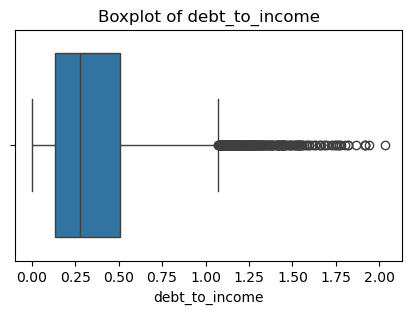

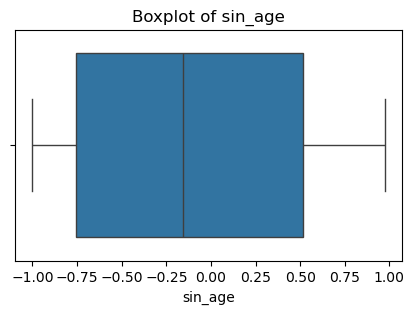

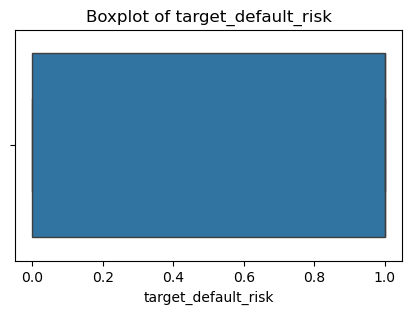

In [13]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
for i in cat_cols_1:
    print(df[i].value_counts())
    print("\n")

home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64


education
Bachelors    4443
HS           2546
Masters      1962
Other         500
PhD           462
Bachlors       87
Name: count, dtype: int64


marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64


region
East     2553
South    2523
North    2479
West     2445
Name: count, dtype: int64


signup_date
2018-06-22    14
2021-01-27    13
2021-04-14    13
2021-11-14    13
2021-06-02    12
              ..
2021-07-02     1
2020-05-31     1
2018-12-16     1
2021-08-03     1
2022-02-01     1
Name: count, Length: 1982, dtype: int64




<Axes: >

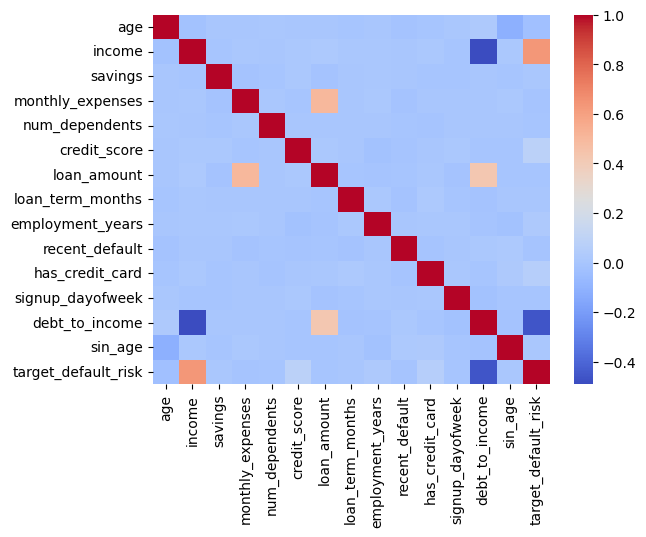

In [16]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

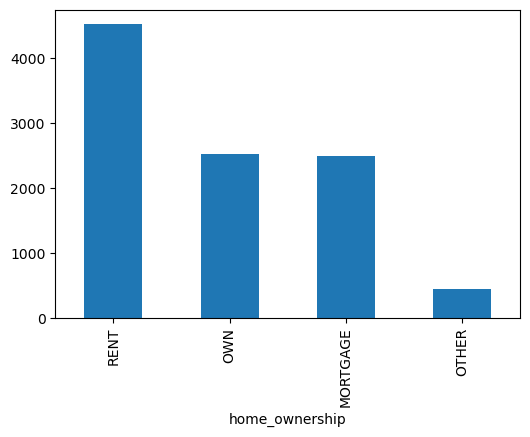

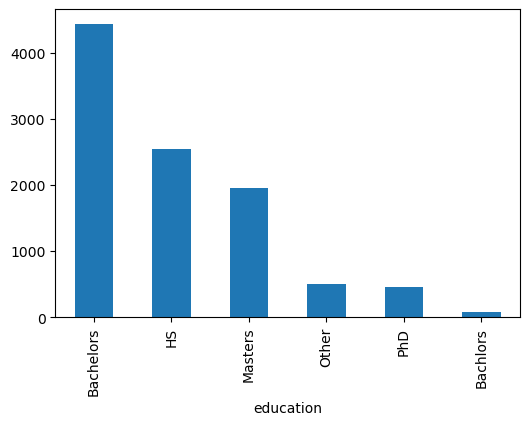

In [21]:
cat_cols_1.pop()
for col in cat_cols_1:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.show()

<Axes: xlabel='target_default_risk', ylabel='count'>

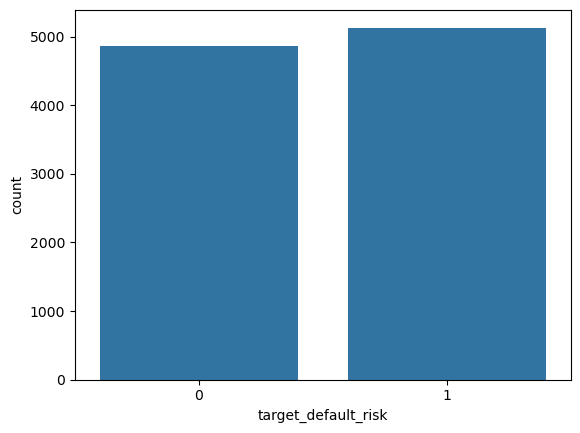

In [22]:
sns.countplot(x = 'target_default_risk',data=df)

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df['education']=df['education'].replace({'Bachlors':'Bachelors'})
df['education']

0              HS
1       Bachelors
2       Bachelors
3              HS
4         Masters
          ...    
9995           HS
9996          PhD
9997           HS
9998        Other
9999    Bachelors
Name: education, Length: 10000, dtype: object

In [25]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit,np.where(df[col] < lower_limit, lower_limit, df[col]))

In [26]:
Q1

np.float64(0.0)

In [27]:
Q3

np.float64(1.0)

In [28]:
IQR

np.float64(1.0)

In [29]:
if 'signup_date' in df.columns:
    df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
    ref_date = pd.to_datetime('today')
    df['signup_recency_days'] = (ref_date - df['signup_date']).dt.days
    df.loc[df['signup_recency_days'] < 0, 'signup_recency_days'] = np.nan
    num_cols = [c for c in num_cols if c != 'signup_date'] + ['signup_recency_days']

In [30]:
df["income_per_dependent"] = df["income"] / (df["num_dependents"] + 1)

In [31]:
df["income_per_dependent"]

0       22245.666667
1       35370.000000
2       38890.000000
3       14524.500000
4       20021.000000
            ...     
9995    22253.500000
9996     5162.750000
9997    16913.500000
9998    12757.666667
9999    26807.000000
Name: income_per_dependent, Length: 10000, dtype: float64

In [32]:
df.drop('signup_date',axis=1,inplace=True)

In [33]:
x=df.drop('target_default_risk',axis=1)
y=df['target_default_risk']

In [34]:
num_cols_1=x.select_dtypes(include=['int64','int32','float64']).columns.tolist()

In [35]:
num_cols_1

['age',
 'income',
 'savings',
 'monthly_expenses',
 'num_dependents',
 'credit_score',
 'loan_amount',
 'loan_term_months',
 'employment_years',
 'recent_default',
 'has_credit_card',
 'signup_dayofweek',
 'debt_to_income',
 'sin_age',
 'signup_recency_days',
 'income_per_dependent']

In [36]:
cat_cols = x.select_dtypes(exclude=['int64',"int32",'float64']).columns

In [37]:
cat_cols

Index(['home_ownership', 'education', 'marital_status', 'region'], dtype='object')

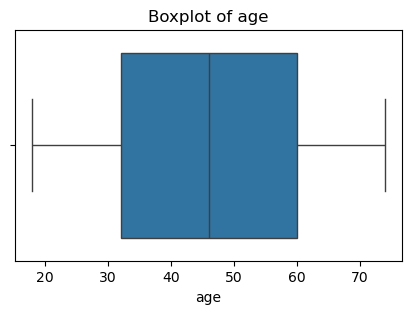

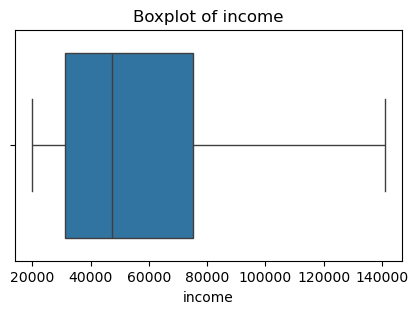

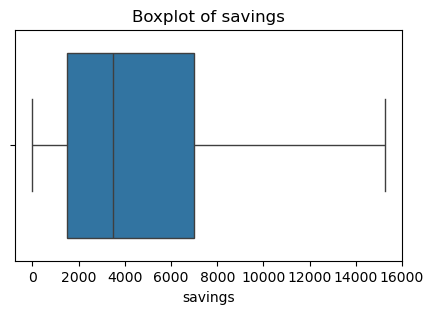

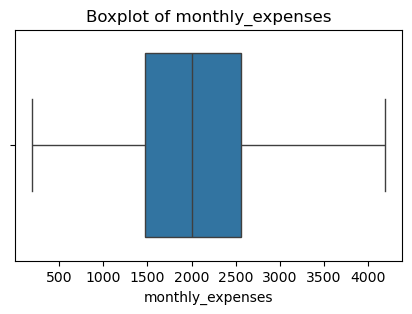

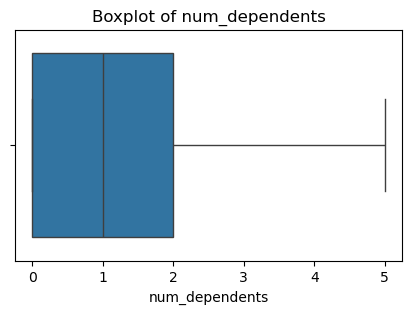

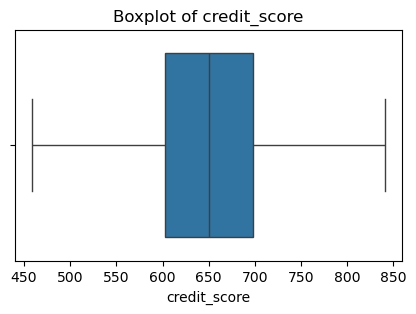

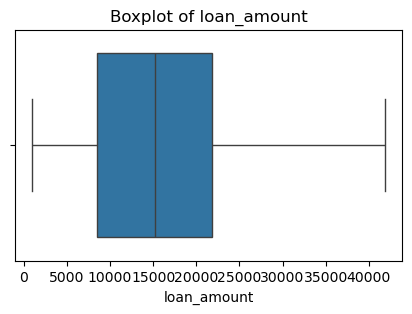

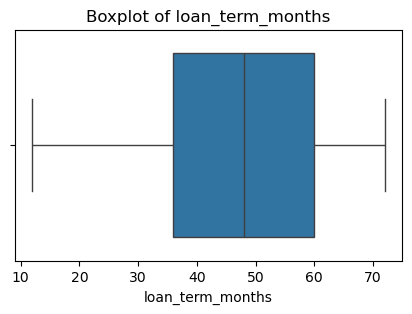

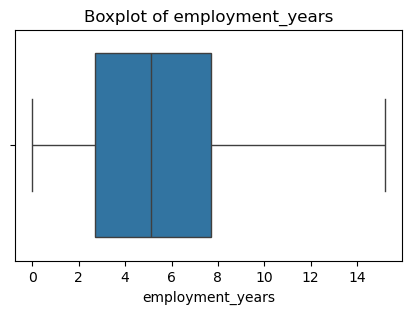

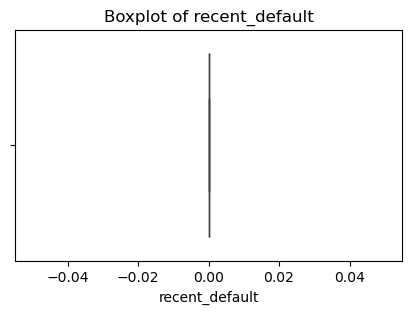

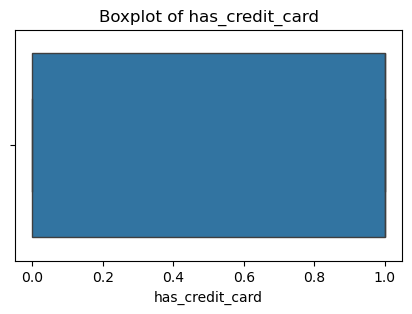

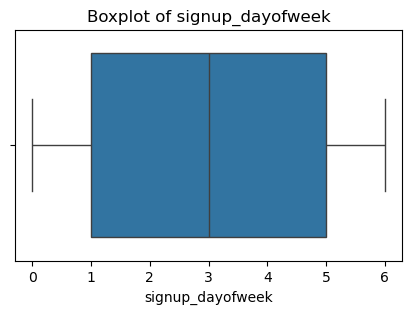

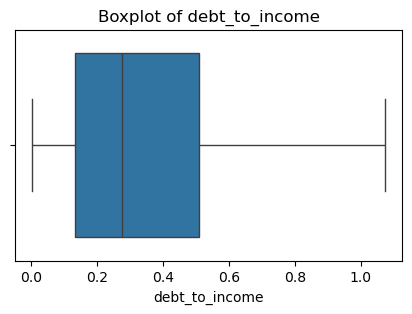

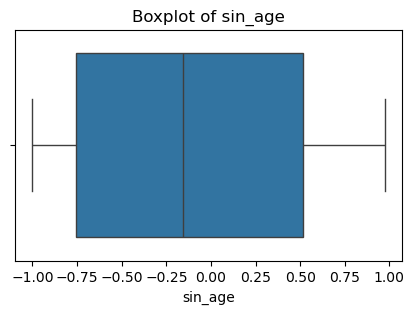

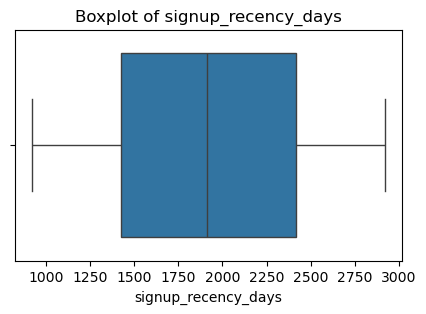

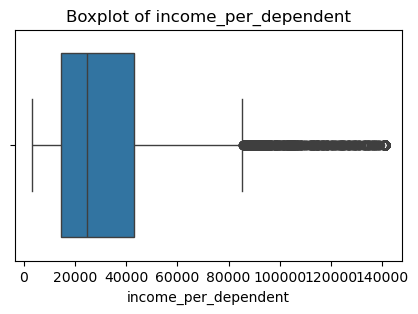

In [38]:
for col in num_cols_1:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [39]:
nominal=cat_cols.drop('education')
nominal

Index(['home_ownership', 'marital_status', 'region'], dtype='object')

In [40]:
ordinal=['education']

In [41]:
ordinal_cat=['Other','HS','Bachelors','Masters','PhD']

In [42]:
numeric_transform=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [43]:
numeric_transform

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [44]:
nominal_transform=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('cat',OneHotEncoder(drop='first',sparse_output=False))

])

In [45]:
nominal_transform

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat', OneHotEncoder(drop='first', sparse_output=False))])

In [46]:
ordinal_transform=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ord',OrdinalEncoder(categories=[ordinal_cat]))
 ])
                           

                           

In [47]:
ordinal_transform

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['Other', 'HS', 'Bachelors',
                                             'Masters', 'PhD']]))])

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transform,num_cols_1),
        ('nominal',nominal_transform,nominal),
        ('ordinal',ordinal_transform,ordinal),
    ],remainder='passthrough'
)

In [49]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'income', 'savings',
                                  'monthly_expenses', 'num_dependents',
                                  'credit_score', 'loan_amount',
                                  'loan_term_months', 'employment_years',
                                  'recent_default', 'has_credit_card',
                                  'signup_dayofweek', 'debt_to_income',
                                  'sin_age', 'si...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['home_ownership', 'marital_status', 'region'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Other',
                                                                              'HS',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD']]))]),
                                 ['education'])])

In [50]:
pre_processor=preprocessor.fit(x)
pre_processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'income', 'savings',
                                  'monthly_expenses', 'num_dependents',
                                  'credit_score', 'loan_amount',
                                  'loan_term_months', 'employment_years',
                                  'recent_default', 'has_credit_card',
                                  'signup_dayofweek', 'debt_to_income',
                                  'sin_age', 'si...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['home_ownership', 'marital_status', 'region'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Other',
                                                                              'HS',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD']]))]),
                                 ['education'])])

In [51]:
X_transform = preprocessor.fit_transform(x)
feature_names=preprocessor.get_feature_names_out()
df_transformed = pd.DataFrame(X_transform,columns = feature_names)

In [52]:
df_transformed.head()

,num__age,num__income,num__savings,num__monthly_expenses,num__num_dependents,num__credit_score,num__loan_amount,num__loan_term_months,num__employment_years,num__recent_default,...,nominal__home_ownership_OTHER,nominal__home_ownership_OWN,nominal__home_ownership_RENT,nominal__marital_status_Married,nominal__marital_status_Single,nominal__marital_status_Widowed,nominal__region_North,nominal__region_South,nominal__region_West,ordinal__education
0,-0.963811,0.270523,1.539205,0.324355,0.718828,-0.658747,1.221111,0.152381,-0.439487,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-1.449922,0.391738,-0.916212,-0.105483,-0.192581,0.483405,-1.162673,-0.623095,-1.383606,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.345214,-0.572711,-0.690927,-0.408150,-1.103990,0.114126,-0.312025,1.703334,-0.941051,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.190701,-0.870707,0.361775,0.595228,-0.192581,0.836582,0.570288,-0.623095,-0.793532,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.709796,0.068428,-0.933858,1.477794,0.718828,-1.247344,0.415926,-0.623095,1.448751,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0


In [53]:
df_transformed.shape
df_transformed.isnull().sum()

num__age                           0
num__income                        0
num__savings                       0
num__monthly_expenses              0
num__num_dependents                0
num__credit_score                  0
num__loan_amount                   0
num__loan_term_months              0
num__employment_years              0
num__recent_default                0
num__has_credit_card               0
num__signup_dayofweek              0
num__debt_to_income                0
num__sin_age                       0
num__signup_recency_days           0
num__income_per_dependent          0
nominal__home_ownership_OTHER      0
nominal__home_ownership_OWN        0
nominal__home_ownership_RENT       0
nominal__marital_status_Married    0
nominal__marital_status_Single     0
nominal__marital_status_Widowed    0
nominal__region_North              0
nominal__region_South              0
nominal__region_West               0
ordinal__education                 0
dtype: int64

In [54]:
X=df_transformed
Y=y

In [55]:
X.head()

,num__age,num__income,num__savings,num__monthly_expenses,num__num_dependents,num__credit_score,num__loan_amount,num__loan_term_months,num__employment_years,num__recent_default,...,nominal__home_ownership_OTHER,nominal__home_ownership_OWN,nominal__home_ownership_RENT,nominal__marital_status_Married,nominal__marital_status_Single,nominal__marital_status_Widowed,nominal__region_North,nominal__region_South,nominal__region_West,ordinal__education
0,-0.963811,0.270523,1.539205,0.324355,0.718828,-0.658747,1.221111,0.152381,-0.439487,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-1.449922,0.391738,-0.916212,-0.105483,-0.192581,0.483405,-1.162673,-0.623095,-1.383606,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.345214,-0.572711,-0.690927,-0.408150,-1.103990,0.114126,-0.312025,1.703334,-0.941051,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.190701,-0.870707,0.361775,0.595228,-0.192581,0.836582,0.570288,-0.623095,-0.793532,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.709796,0.068428,-0.933858,1.477794,0.718828,-1.247344,0.415926,-0.623095,1.448751,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0


In [56]:
Y.value_counts()

target_default_risk
1.0    5132
0.0    4868
Name: count, dtype: int64

In [57]:
from collections import Counter

In [58]:
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(X,Y)

In [59]:
x_res.columns

Index(['num__age', 'num__income', 'num__savings', 'num__monthly_expenses',
       'num__num_dependents', 'num__credit_score', 'num__loan_amount',
       'num__loan_term_months', 'num__employment_years', 'num__recent_default',
       'num__has_credit_card', 'num__signup_dayofweek', 'num__debt_to_income',
       'num__sin_age', 'num__signup_recency_days', 'num__income_per_dependent',
       'nominal__home_ownership_OTHER', 'nominal__home_ownership_OWN',
       'nominal__home_ownership_RENT', 'nominal__marital_status_Married',
       'nominal__marital_status_Single', 'nominal__marital_status_Widowed',
       'nominal__region_North', 'nominal__region_South',
       'nominal__region_West', 'ordinal__education'],
      dtype='object')

In [60]:
y_res

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
10259    0.0
10260    0.0
10261    0.0
10262    0.0
10263    0.0
Name: target_default_risk, Length: 10264, dtype: float64

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [62]:
model=LogisticRegression()

In [63]:
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred=model.predict(x_test)
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1042
         1.0       0.93      0.90      0.92      1011

    accuracy                           0.92      2053
   macro avg       0.92      0.92      0.92      2053
weighted avg       0.92      0.92      0.92      2053



In [66]:
CM = confusion_matrix(y_test,y_pred)
CM

array([[972,  70],
       [ 98, 913]])

In [67]:
Random_forest=RandomForestClassifier()

In [68]:
Random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred_Random_forest=Random_forest.predict(x_test)

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred_Random_forest))
print("Precision:", precision_score(y_test, y_pred_Random_forest))
print("Recall:", recall_score(y_test, y_pred_Random_forest))
print("F1-score:", f1_score(y_test, y_pred_Random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Random_forest))

Accuracy: 0.9313200194836824
Precision: 0.9332669322709163
Recall: 0.9268051434223541
F1-score: 0.9300248138957816
Confusion Matrix:
 [[975  67]
 [ 74 937]]


In [71]:
SVM=SVC()

In [72]:
SVM.fit(x_train,y_train)

SVC()

In [73]:
y_pred_SVM=SVM.predict(x_test)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Precision:", precision_score(y_test, y_pred_SVM))
print("Recall:", recall_score(y_test, y_pred_SVM))
print("F1-score:", f1_score(y_test, y_pred_SVM))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))

Accuracy: 0.9279103750608865
Precision: 0.9362992922143579
Recall: 0.9159248269040554
F1-score: 0.926
Confusion Matrix:
 [[979  63]
 [ 85 926]]


In [75]:
DT =DecisionTreeClassifier(random_state=42)

In [76]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred_DT=DT.predict(x_test)

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT))
print("Recall:", recall_score(y_test, y_pred_DT))
print("F1-score:", f1_score(y_test, y_pred_DT))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_DT))

Accuracy: 0.9288845591816853
Precision: 0.9236043095004897
Recall: 0.9327398615232443
F1-score: 0.9281496062992126
Confusion Matrix:
 [[964  78]
 [ 68 943]]
